# 1.Clean data set
run this first 

In [1]:
pip install pandas

  Using cached pandas-2.3.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.5-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp311-cp311-win_amd64.whl (11.3 MB)
   ---------------------------------------- 0.0/13.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.1 MB 393.8 kB/s eta 0:00:34
   - -------------------------------------- 0.5/13.1 MB 3.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.3/13.1 MB 7.5 MB/s eta 0:00:02
   ------- -------------------------------- 2.5/13.1 MB 11.6 MB/s eta 0:00:01
   ------------- -------------------------- 4.3/13.1 MB 16.2 MB/s eta 0:00:01
   -------------------- ------------------- 6.7/13.1 MB 21.4 MB/s eta 0:00:01
   ------------------------------- -------- 10.3/13.1 MB 


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
df = pd.read_csv('owid-co2-data.csv')
df_show=df.head(10)
print(df_show)

       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   
5  Afghanistan  1755      AFG         NaN  NaN         0.0   
6  Afghanistan  1756      AFG         NaN  NaN         0.0   
7  Afghanistan  1757      AFG         NaN  NaN         0.0   
8  Afghanistan  1758      AFG         NaN  NaN         0.0   
9  Afghanistan  1759      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN    

In [ ]:
import pandas as pd
import io

# 1. อ่านไฟล์ CSV
df = pd.read_csv('owid-co2-data.csv')

# กรอกค่าปีที่ระบุ
start_year = 2000
end_year = 2024

# ทำการสร้าง dataframe
df_filtered_year = df[(df['year'] >= start_year) & (df['year'] <= end_year)].copy()

print(f"✅ กรองข้อมูลเฉพาะปี {start_year} ถึง {end_year} แล้ว")
print(f"จำนวนแถวก่อนการคลีน NaN: {len(df_filtered_year)}")


# คลีนค่าที่attribute ระบุว่าเป็น NaN ทั่้งสอง attribute
# กำหนดคอลัมน์ที่จะใช้พิจารณาค่าว่าง
columns_to_check = ['co2_per_capita', 'co2_per_unit_energy']

# ใช้ .dropna() เพื่อลบแถว
# subset: ระบุคอลัมน์ที่จะใช้พิจารณา
# how='all': ลบแถวนั้นเฉพาะเมื่อทุกคอลัมน์ใน subset ที่ระบุเป็นค่าว่าง (NaN) เท่านั้น
df_cleaned = df_filtered_year.dropna(
    subset=columns_to_check,
    how='all'
).copy()

# --- 3. สรุปผลลัพธ์ ---
dropped_count = len(df_filtered_year) - len(df_cleaned)
print(f"จำนวนแถวหลังการคลีน NaN: {len(df_cleaned)}")
print(f"จำนวนแถวที่ถูกลบออก (ไม่มีข้อมูลทั้งสอง Attribute): {dropped_count}")

# แสดงตัวอย่างข้อมูลที่ผ่านการกรองและคลีนแล้ว
print("\nตัวอย่างข้อมูลที่ถูกคลีนแล้ว (5 แถวแรก) ###")
print(df_cleaned[['country', 'year'] + columns_to_check].head())

# --- 4. บันทึกผลลัพธ์เป็น CSV ---
output_filename = "co2_data_2000_2024_cleaned.csv"
df_cleaned.to_csv(output_filename, index=False)
print(f"\n✅ บันทึกไฟล์ที่ถูกคลีนแล้วไว้ที่: {output_filename}")

✅ กรองข้อมูลเฉพาะปี 2000 ถึง 2024 แล้ว
จำนวนแถวก่อนการคลีน NaN: 6346
จำนวนแถวหลังการคลีน NaN: 5799
จำนวนแถวที่ถูกลบออก (ไม่มีข้อมูลทั้งสอง Attribute): 547

### ตัวอย่างข้อมูลที่ถูกคลีนแล้ว (5 แถวแรก) ###
         country  year  co2_per_capita  co2_per_unit_energy
250  Afghanistan  2000           0.052                0.198
251  Afghanistan  2001           0.053                0.293
252  Afghanistan  2002           0.063                0.403
253  Afghanistan  2003           0.069                0.393
254  Afghanistan  2004           0.053                0.333

✅ บันทึกไฟล์ที่ถูกคลีนแล้วไว้ที่: co2_data_2000_2024_cleaned.csv


# จัดหมวดหมู่ประเทศว่าพัฒนาเเล้วหรือยังไม่พัฒนา

In [ ]:
import pandas as pd

# 1) อ่านไฟล์ดาต้า
df = pd.read_csv("co2_data_2000_2024_cleaned.csv")

# 2) คำนวณ GDP ต่อหัว (gdp_per_capita) เพิ่มเข้าไปในตาราง
#    ถ้าคอลัมน์ชื่อ gdp / population อยู่แล้ว ใช้แบบนี้ได้เลย
df["gdp_per_capita"] = df["gdp"] / df["population"]

# 3) เลือก "ช่วงปีฐาน" เพื่อเอาไปคำนวณระดับความพัฒนา
#    ตัวอย่าง: ใช้ช่วงปี 2000–2005 เฉลี่ยเป็นตัวแทนรายได้ของประเทศนั้น
base_years_mask = (df["year"] >= 2000) & (df["year"] <= 2024)

dev_base = (
    df[base_years_mask]
      .groupby(["iso_code", "country"], as_index=False)["gdp_per_capita"]
      .mean()
      .rename(columns={"gdp_per_capita": "gdp_pc_base"})
)

# 4) หาค่า quantile 1/3 และ 2/3
#    - กลุ่มล่างสุด 0–33%  => "ด้อยพัฒนา"
#    - กลุ่มกลาง 33–66%    => "กำลังพัฒนา"
#    - กลุ่มบน 66–100%     => "พัฒนาแล้ว"
q1 = dev_base["gdp_pc_base"].quantile(1/3)
q2 = dev_base["gdp_pc_base"].quantile(2/3)

def dev_label(gdp_pc):
    """รับค่า GDP ต่อหัวเฉลี่ยของประเทศ แล้วแปะ label ภาษาไทยให้"""
    if pd.isna(gdp_pc):
        return "Unknown"          # เผื่อกรณีไม่มีข้อมูล
    if gdp_pc < q1:
        return "No-Develop"
    elif gdp_pc < q2:
        return "Developing"
    else:
        return "Developed"

# 5) สร้างคอลัมน์ระดับความพัฒนาในตาราง dev_base
dev_base["dev_level"] = dev_base["gdp_pc_base"].apply(dev_label)

# 6) เอาคอลัมน์ dev_level ไป merge กลับเข้าดาต้าหลักทุกปีของประเทศนั้น
#    ใช้ iso_code เป็น key (หรือจะใช้ country ก็ได้ ถ้าชื่อไม่ซ้ำ)
df = df.merge(
    dev_base[["iso_code", "dev_level"]],
    on="iso_code",
    how="left"
)

# ตอนนี้ df จะมีคอลัมน์ใหม่ชื่อ "dev_level" ที่บอกระดับพัฒนาของแต่ละประเทศแล้ว
print(df[["country", "year", "gdp_per_capita", "dev_level"]].head(20))

# 7) บันทึกไฟล์ใหม่ออกมาเผื่อเอาไปใช้ต่อ
df.to_csv("co2_data_2000_2024_with_dev_level.csv", index=False)


        country  year  gdp_per_capita   dev_level
0   Afghanistan  2000      560.536857  No-Develop
1   Afghanistan  2001      543.339987  No-Develop
2   Afghanistan  2002      879.631552  No-Develop
3   Afghanistan  2003      927.035336  No-Develop
4   Afghanistan  2004      947.875583  No-Develop
5   Afghanistan  2005     1040.693674  No-Develop
6   Afghanistan  2006     1129.023247  No-Develop
7   Afghanistan  2007     1331.830446  No-Develop
8   Afghanistan  2008     1380.566879  No-Develop
9   Afghanistan  2009     1615.035225  No-Develop
10  Afghanistan  2010     1675.833619  No-Develop
11  Afghanistan  2011     1817.052834  No-Develop
12  Afghanistan  2012     1936.087379  No-Develop
13  Afghanistan  2013     1992.039961  No-Develop
14  Afghanistan  2014     1962.218527  No-Develop
15  Afghanistan  2015     1855.752672  No-Develop
16  Afghanistan  2016     1855.074361  No-Develop
17  Afghanistan  2017     1826.035736  No-Develop
18  Afghanistan  2018     1796.169801  No-Develop


PermissionError: [Errno 13] Permission denied: 'co2_data_2000_2024_with_dev_level.csv'

# Clean ประเทศที่ไม่มีค่าความเจริญหรือ มีความเจริญเป็น Unknow

In [33]:
import pandas as pd

# โหลดไฟล์
df = pd.read_csv("co2_data_2000_2024_with_dev_level.csv")

# วิธีที่ 1: เขียนทีเดียวจบ
df = df[
    df["dev_level"].notna() &            # ไม่เอา NaN
    (df["dev_level"] != "Unknow") &      # ไม่เอา "Unknow"
    (df["dev_level"] != "Unknown")       # (เผื่อสะกดแบบนี้ด้วย)
]

# เซฟออกเป็นไฟล์ใหม่ (ถ้าต้องการ)
df.to_csv("co2_data_2000_2024_clear_dev_level.csv", index=False)


# แบ่งชุด Train Test Set
Train 20
Test 4

X shape: (17, 6, 3)
y shape: (17, 1)
years of y: [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022]
Train size: (13, 6, 3) (13, 1)
Test size: (4, 6, 3) (4, 1)


c:\Users\minec\Desktop\p3\datesci\T1 Group assign\co2-data-master\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_29 (LSTM)                  │ (None, 32)             │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,641 (18.13 KB)

 Trainable params: 4,641 (18.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/49
2/2 - 2s - 892ms/step - loss: 0.3207 - val_loss: 0.5551
Epoch 2/49
2/2 - 0s - 40ms/step - loss: 0.2694 - val_loss: 0.4880
Epoch 3/49
2/2 - 0s - 42ms/step - loss: 0.2176 - val_loss: 0.4248
Epoch 4/49
2/2 - 0s - 42ms/step - loss: 0.1771 - val_loss: 0.3645
Epoch 5/49
2/2 - 0s - 49ms/step - loss: 0.1424 - val_loss: 0.3089
Epoch 6/49
2/2 - 0s - 41ms/step - loss: 0.1065 - val_loss: 0.2586
Epoch 7/49
2/2 - 0s - 43ms/step - loss: 0.0820 - val_loss: 0.2119
Epoch 8/49
2/2 - 0s - 50ms/step - loss: 0.0633 - val_loss: 0.1698
Epoch 9/49
2/2 - 0s - 40ms/step - loss: 0.0508 - val_loss: 0.1334
Epoch 10/49
2/2 - 0s - 39ms/step - loss: 0.0440 - val_loss: 0.1036
Epoch 11/49
2/2 - 0s - 40ms/step - loss: 0.0405 - val_loss: 0.0812
Epoch 12/49
2/2 - 0s - 38ms/step - loss: 0.0417 - val_loss: 0.0651
Epoch 13/49
2/2 - 0s - 40ms/step - loss: 0.0453 - val_loss: 0.0545
Epoch 14/49
2/2 - 0s - 40ms/step - loss: 0.0467 - val_loss: 0.0494
Epoch 15/49
2/2 - 0s - 41ms/step - loss: 0.0454 - val_loss: 0.0493
Epo

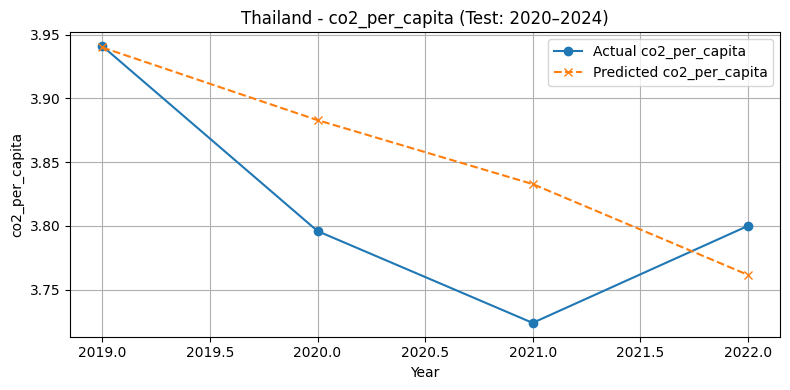

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# -----------------------------
# 0) เลือกประเทศ + ช่วงปี
# -----------------------------
country = "Thailand"  # เปลี่ยนประเทศได้
df_c = df[df["country"] == country].copy()

# ดึงช่วงปี 2000–2024 (เพื่อให้มี y ถึงปี 2024 ได้)
df_c = df_c[(df_c["year"] >= 2000) & (df_c["year"] <= 2022)].copy()
df_c = df_c.sort_values("year")

# -----------------------------
# 1) เลือก feature และ target
#    X: gdp_per_capita, energy_per_gdp, co2_per_unit_energy
#    y: co2_per_capita (ปีถัดไป)
# -----------------------------
feature_cols = ["gdp_per_capita", "energy_per_gdp", "co2_per_unit_energy"]
target_col   = "co2_per_capita"

# ตัด NaN ทิ้ง (สำคัญมาก)
df_c = df_c.dropna(subset=feature_cols + [target_col])

X_all = df_c[feature_cols].values.astype("float32")        # (T, 3)
y_all = df_c[target_col].values.astype("float32").reshape(-1, 1)  # (T, 1)
years = df_c["year"].values

# -----------------------------
# 2) สเกลข้อมูล (แยก X / y)
# -----------------------------
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaled = X_scaler.fit_transform(X_all)   # (T, 3)
y_scaled = y_scaler.fit_transform(y_all)   # (T, 1)

# -----------------------------
# 3) สร้าง sequence ย้อนหลัง (look_back ปี)
# -----------------------------
def create_sequences_multi(X_data, y_data, years, look_back=5):
    X_seq, y_seq, y_years = [], [], []
    for i in range(len(X_data) - look_back):
        # window ย้อนหลัง look_back ปี
        X_seq.append(X_data[i : i + look_back, :])   # (look_back, n_features)
        # y = ค่า co2_per_capita ของ "ปีถัดไปหลัง window"
        y_seq.append(y_data[i + look_back, :])       # (1,)
        # เก็บปีของค่าที่ถูกทำนาย (ปีของ y)
        y_years.append(years[i + look_back])
    return np.array(X_seq), np.array(y_seq), np.array(y_years)

look_back = 6
X, y, y_years = create_sequences_multi(X_scaled, y_scaled, years, look_back)

print("X shape:", X.shape)  # (n_samples, look_back, 3)
print("y shape:", y.shape)  # (n_samples, 1)
print("years of y:", y_years)

# -----------------------------
# 4) แบ่ง train / test ตาม "ปีของ y"
#    - เทรน: ทำนายปี <= 2018
#    - เทสต์: ทำนายปี >= 2019
# -----------------------------
train_mask = (y_years <= 2018)
test_mask  = (y_years >= 2019)

X_train, y_train = X[train_mask], y[train_mask]
X_test,  y_test  = X[test_mask],  y[test_mask]
test_years       = y_years[test_mask]

print("Train size:", X_train.shape, y_train.shape)
print("Test size:",  X_test.shape,  y_test.shape)

if X_train.shape[0] == 0 or X_test.shape[0] == 0:
    raise ValueError("train/test ว่าง ลองเช็คว่าประเทศนี้มีข้อมูลถึงปี 2024 จริงไหม หรือเปลี่ยนช่วงปีดู")

# -----------------------------
# 5) สร้างโมเดล LSTM
# -----------------------------
n_features = len(feature_cols)

model = Sequential([
    LSTM(32, input_shape=(look_back, n_features)),
    Dense(1)  # ทำนาย co2_per_capita แค่ตัวเดียว
])

model.compile(optimizer="adam", loss="mse")
model.summary()

# -----------------------------
# 6) เทรนโมเดล
# -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=49,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=2
)

# -----------------------------
# 7) ทำนายบนช่วง test + inverse scale
# -----------------------------
y_pred_scaled = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_true = y_scaler.inverse_transform(y_test)

# -----------------------------
# 8) แสดงผลตัวเลข
# -----------------------------
for year, true_val, pred_val in zip(test_years, y_true, y_pred):
    print(f"ปี {year}: จริง = {true_val[0]:.3f}, ทำนาย = {pred_val[0]:.3f}")

# -----------------------------
# 9) Plot กราฟค่าจริง vs ค่าทำนาย
# -----------------------------
plt.figure(figsize=(8, 4))
plt.plot(test_years, y_true[:, 0], marker="o", label="Actual co2_per_capita")
plt.plot(test_years, y_pred[:, 0], marker="x", linestyle="--", label="Predicted co2_per_capita")
plt.title(f"{country} - co2_per_capita (Test: 2020–2024)")
plt.xlabel("Year")
plt.ylabel("co2_per_capita")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Classify with Dev_level

จำนวนแถวในกลุ่ม Developed : 1265
ประเทศในกลุ่มนี้: ['Argentina' 'Australia' 'Austria' 'Bahrain' 'Belgium' 'Canada' 'Chile'
 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Equatorial Guinea' 'Estonia'
 'Finland' 'France' 'Germany' 'Greece' 'Hong Kong' 'Hungary' 'Iceland'
 'Ireland' 'Israel' 'Italy' 'Japan' 'Kazakhstan' 'Kuwait' 'Latvia'
 'Lithuania' 'Luxembourg' 'Malaysia' 'Malta' 'Mauritius' 'Netherlands'
 'New Zealand' 'Norway' 'Oman' 'Poland' 'Portugal' 'Qatar' 'Russia'
 'Saudi Arabia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South Korea' 'Spain' 'Sweden' 'Switzerland' 'Taiwan'
 'Trinidad and Tobago' 'Turkey' 'United Arab Emirates' 'United Kingdom'
 'United States']
ปีทั้งหมดหลัง dropna: [np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(20

c:\Users\minec\Desktop\p3\datesci\T1 Group assign\co2-data-master\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                  │ (None, 32)             │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,641 (18.13 KB)

 Trainable params: 4,641 (18.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/47
26/26 - 2s - 65ms/step - loss: 0.0125 - val_loss: 0.0072
Epoch 2/47
26/26 - 0s - 5ms/step - loss: 0.0080 - val_loss: 0.0047
Epoch 3/47
26/26 - 0s - 6ms/step - loss: 0.0061 - val_loss: 0.0039
Epoch 4/47
26/26 - 0s - 5ms/step - loss: 0.0047 - val_loss: 0.0030
Epoch 5/47
26/26 - 0s - 9ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 6/47
26/26 - 0s - 5ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 7/47
26/26 - 0s - 6ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 8/47
26/26 - 0s - 5ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 9/47
26/26 - 0s - 5ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 10/47
26/26 - 0s - 5ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 11/47
26/26 - 0s - 6ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 12/47
26/26 - 0s - 5ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 13/47
26/26 - 0s - 6ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 14/47
26/26 - 0s - 5ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 15/47
26/26 - 0s - 6ms/step - loss: 0.0023 - val_l

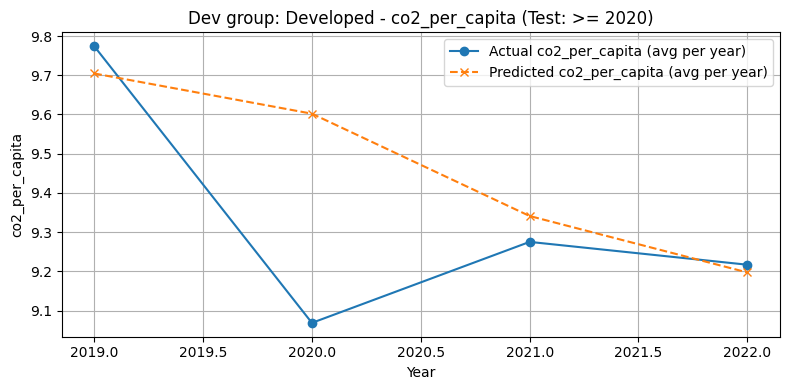

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df=pd.read_csv("co2_data_2000_2024_clear_dev_level.csv")

# -----------------------------
# 0) เลือก dev_level + ช่วงปี
# -----------------------------
# เลือกกลุ่มความเจริญ: "No-Develop", "Developing", "Developed"
dev_group = "Developed"   # <-- เปลี่ยนตรงนี้เวลาอยากดูแต่ละกลุ่ม

# เลือกเฉพาะกลุ่ม dev_level นั้น ๆ
df_g = df[df["dev_level"] == dev_group].copy()

# เลือกช่วงปีที่อยากใช้กับโมเดล (2000–2022)
df_g = df_g[(df_g["year"] >= 2000) & (df_g["year"] <= 2022)].copy()
df_g = df_g.sort_values(["country", "year"])

print("จำนวนแถวในกลุ่ม", dev_group, ":", len(df_g))
print("ประเทศในกลุ่มนี้:", df_g["country"].unique())

# -----------------------------
# 1) เลือก feature และ target
#    X: gdp_per_capita, energy_per_gdp, co2_per_unit_energy
#    y: co2_per_capita (ปีถัดไป)
# -----------------------------
feature_cols = ["gdp_per_capita", "energy_per_gdp", "co2_per_unit_energy"]
target_col   = "co2_per_capita"

# ตัด NaN ทิ้ง (สำคัญมาก)
df_g = df_g.dropna(subset=feature_cols + [target_col])

print("ปีทั้งหมดหลัง dropna:", sorted(df_g["year"].unique()))

# -----------------------------
# 2) สเกลข้อมูล (แยก X / y) ทั้งกลุ่ม dev_level
# -----------------------------
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_all = df_g[feature_cols].values.astype("float32")   # (T, 3)
y_all = df_g[target_col].values.astype("float32").reshape(-1, 1)  # (T, 1)

X_scaled = X_scaler.fit_transform(X_all)
y_scaled = y_scaler.fit_transform(y_all)

# เอาค่าที่สเกลแล้วใส่กลับเข้า df_g เพื่อให้ groupby ได้ง่าย
for i, col in enumerate(feature_cols):
    df_g[col + "_scaled"] = X_scaled[:, i]
df_g[target_col + "_scaled"] = y_scaled[:, 0]

# -----------------------------
# 3) สร้าง sequence แยกทีละประเทศ (กันข้อมูลข้ามประเทศมาปนกัน)
#    look_back = ย้อนหลังกี่ปี
# -----------------------------
def create_sequences_by_country(df_group, feature_cols_scaled, target_col_scaled, look_back=5):
    X_list, y_list, y_years = [], [], []

    for country_name, df_c in df_group.groupby("country"):
        df_c = df_c.sort_values("year")
        years_c = df_c["year"].values

        X_data = df_c[feature_cols_scaled].values   # (Tc, n_features)
        y_data = df_c[target_col_scaled].values.reshape(-1, 1)  # (Tc, 1)

        if len(df_c) <= look_back:
            continue  # ข้อมูลปีน้อยเกินไป สร้าง window ไม่ได้

        for i in range(len(df_c) - look_back):
            # window ย้อนหลัง look_back ปี สำหรับประเทศนี้
            X_list.append(X_data[i : i + look_back, :])
            # y = co2_per_capita (scaled) ของปีถัดไป
            y_list.append(y_data[i + look_back, :])
            # เก็บ "ปีของค่าที่ทำนาย" ไว้ใช้แบ่ง train/test
            y_years.append(years_c[i + look_back])

    return np.array(X_list), np.array(y_list), np.array(y_years)

look_back = 5
feature_cols_scaled = [c + "_scaled" for c in feature_cols]
target_col_scaled = target_col + "_scaled"

X, y, y_years = create_sequences_by_country(df_g, feature_cols_scaled, target_col_scaled, look_back)

print("X shape:", X.shape)  # (n_samples, look_back, 3)
print("y shape:", y.shape)  # (n_samples, 1)
print("ปีของ y (ตัวที่ถูกทำนาย):", np.unique(y_years))

# -----------------------------
# 4) แบ่ง train / test ตาม "ปีของ y"
#    - เทรน: ทำนายปี <= 2019
#    - เทสต์: ทำนายปี >= 2020
# -----------------------------
train_mask = (y_years <= 2018)
test_mask  = (y_years >= 2019)

X_train, y_train = X[train_mask], y[train_mask]
X_test,  y_test  = X[test_mask],  y[test_mask]
test_years       = y_years[test_mask]

print("Train size:", X_train.shape, y_train.shape)
print("Test size:",  X_test.shape,  y_test.shape)

if X_train.shape[0] == 0 or X_test.shape[0] == 0:
    raise ValueError(
        f"train/test ว่างในกลุ่ม {dev_group} — ลองเปลี่ยนช่วงปี, look_back หรือเลือก dev_level กลุ่มอื่นดู"
    )

# -----------------------------
# 5) สร้างโมเดล LSTM
# -----------------------------
n_features = len(feature_cols)

model = Sequential([
    LSTM(32, input_shape=(look_back, n_features)),
    Dense(1)  # ทำนาย co2_per_capita แค่ตัวเดียว
])

model.compile(optimizer="adam", loss="mse")
model.summary()

# -----------------------------
# 6) เทรนโมเดล
# -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=47,
    batch_size=30,
    validation_data=(X_test, y_test),
    verbose=2
)

# -----------------------------
# 7) ทำนายบนช่วง test + inverse scale
# -----------------------------
y_pred_scaled = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_true = y_scaler.inverse_transform(y_test)

# -----------------------------
# 8) สรุปผลแบบเฉลี่ยรายปี (เพราะหนึ่งปีมีหลายประเทศ)
# -----------------------------
results = pd.DataFrame({
    "year": test_years,
    "true": y_true[:, 0],
    "pred": y_pred[:, 0],
})

print("\nค่าเฉลี่ยรายปีในกลุ่ม", dev_group)
for year, group in results.groupby("year"):
    print(
        f"ปี {int(year)} | จริงเฉลี่ย = {group['true'].mean():.3f} | ทำนายเฉลี่ย = {group['pred'].mean():.3f}"
    )

# -----------------------------
# 9) Plot กราฟค่าจริง vs ค่าทำนาย (เฉลี่ยต่อปี)
# -----------------------------
mean_by_year = results.groupby("year").mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(mean_by_year["year"], mean_by_year["true"], marker="o", label="Actual co2_per_capita (avg per year)")
plt.plot(mean_by_year["year"], mean_by_year["pred"], marker="x", linestyle="--", label="Predicted co2_per_capita (avg per year)")
plt.title(f"Dev group: {dev_group} - co2_per_capita (Test: >= 2020)")
plt.xlabel("Year")
plt.ylabel("co2_per_capita")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
